---------------------------------------
Affichage données initiales            xclara.arff


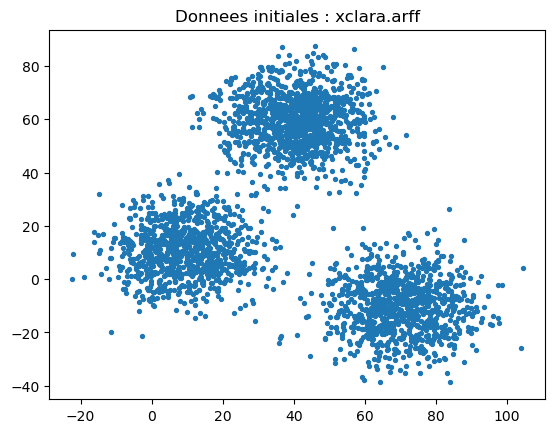

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import time
from scipy.io import arff
from sklearn import cluster
from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score,silhouette_samples
import os

os.environ["OMP_NUM_THREADS"] = '4'
path = '/home/khira/Téléchargements/artificial/'
name="xclara.arff"
import warnings

# Suppress FutureWarning from KMeans
warnings.simplefilter(action='ignore', category=FutureWarning)
#path_out = './fig/'
databrut = arff.loadarff(open(path+str(name), 'r'))

datanp = np.array([[x[0],x[1]] for x in databrut[0]])


# PLOT datanp (en 2D) - / scatter plot
# Extraire chaque valeur de features pour en faire une liste
# EX : 
# - pour t1=t[:,0] --> [1, 3, 5, 7]
# - pour t2=t[:,1] --> [2, 4, 6, 8]
print("---------------------------------------")
print("Affichage données initiales            "+ str(name))
f0 = datanp[:,0] # tous les élements de la première colonne
f1 = datanp[:,1] # tous les éléments de la deuxième colonne

#plt.figure(figsize=(6, 6))
plt.scatter(f0, f1, s=8)
plt.title("Donnees initiales : "+ str(name))
#plt.savefig(path_out+"Plot-kmeans-code1-"+str(name)+"-init.jpg",bbox_inches='tight', pad_inches=0.1)
plt.show()


------------------------------------------------------
Appel KMeans pour une valeur de k fixée


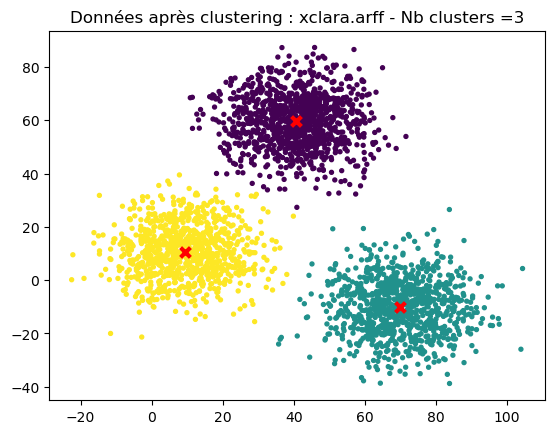

nb clusters = 3 , nb iter = 3 , inertie =  611605.880693389 , runtime =  7.97 ms


In [11]:
# Run clustering method for a given number of clusters
print("------------------------------------------------------")
print("Appel KMeans pour une valeur de k fixée")
tps1 = time.time()
k=3
model = cluster.KMeans(n_clusters=k, init='k-means++', n_init=1)
model.fit(datanp)
tps2 = time.time()
labels = model.labels_
# informations sur le clustering obtenu
iteration = model.n_iter_
inertie = model.inertia_
centroids = model.cluster_centers_

#plt.figure(figsize=(6, 6))
plt.scatter(f0, f1, c=labels, s=8)
plt.scatter(centroids[:, 0],centroids[:, 1], marker="x", s=50, linewidths=3, color="red")
plt.title("Données après clustering : "+ str(name) + " - Nb clusters ="+ str(k))
#plt.savefig(path_out+"Plot-kmeans-code1-"+str(name)+"-cluster.jpg",bbox_inches='tight', pad_inches=0.1)
plt.show()

print("nb clusters =",k,", nb iter =",iteration, ", inertie = ",inertie, ", runtime = ", round((tps2 - tps1)*1000,2),"ms")
#print("labels", labels)

In [43]:
print("les scores de regroupement de chaque cluster (distance minimale, maximale, moyenne entre les points d’un cluster et son centre)")
from sklearn.metrics.pairwise import euclidean_distances
k=3
def cluster_distance(k,dataset,labels,centroids):
    distance=euclidean_distances(datanp,centroids)
    #clusters_points.append(dataset[labels == k])
    cluster_indices=np.where(labels==k)[0]
    distances_for_cluster=distance[cluster_indices,k]
    min_distance=np.min(distances_for_cluster)
    max_distance=np.max(distances_for_cluster)
    avg_distance=np.mean(distances_for_cluster)
    print(f"---------------------------Cluster{k+1}--------------------------------------")
    print("                                      ")
    print("mins = ",min_distance)
    print("maxs = ",max_distance)
    print("means = ",avg_distance)
        

def dist_min_inter_cluster(k, centroids):
    mins = []
    i = 0
    j = 1
    while i < k :
        if i == k-1 :
            mins.append(euclidean_distances(centroids[i].reshape(1,-1),centroids[0].reshape(1,-1)))
        else:
            mins.append(euclidean_distances(centroids[i].reshape(1,-1),centroids[j].reshape(1,-1)))
        i = j
        j = j+1
    return np.min(mins)

def dist_max_inter_cluster(k, centroids):
    maxs = []
    i = 0
    j = 1
    while i < k :
        if i == k-1 :
            maxs.append(euclidean_distances(centroids[i].reshape(1,-1),centroids[0].reshape(1,-1)))
        else:
            maxs.append(euclidean_distances(centroids[i].reshape(1,-1),centroids[j].reshape(1,-1)))
        i = j
        j = j+1
    return np.max(maxs)

def dist_mean_inter_cluster(k, centroids):
    means = []
    i = 0
    j = 1
    while i < k :
        if i == k-1 :
            means.append(euclidean_distances(centroids[i].reshape(1,-1),centroids[0].reshape(1,-1)))
        else:
            means.append(euclidean_distances(centroids[i].reshape(1,-1),centroids[j].reshape(1,-1)))
        i = j
        j = j+1
    return np.mean(means)

for i in range(k):
    cluster_distance(i,datanp,labels,centroids)
print("---------------------------------------------------------------------------------")    
print("les scores de séparation de chaque clusters")
    
print("min inter-cluster  = ",dist_min_inter_cluster(k, centroids))
print("max inter-cluster  = ",dist_max_inter_cluster(k, centroids))
print("mean inter-cluster = ",dist_mean_inter_cluster(k, centroids))
                                        

les scores de regroupement de chaque cluster (distance minimale, maximale, moyenne entre les points d’un cluster et son centre)
---------------------------Cluster1--------------------------------------
                                      
mins =  0.44324656476472946
maxs =  32.40028103296846
means =  12.43904948679114
---------------------------Cluster2--------------------------------------
                                      
mins =  0.9412681980501666
maxs =  39.15351100489387
means =  13.036739611638613
---------------------------Cluster3--------------------------------------
                                      
mins =  0.2904903300622054
maxs =  37.21256190019523
means =  12.579820626841343
---------------------------------------------------------------------------------
les scores de séparation de chaque clusters
min inter-cluster  =  58.11810068295885
max inter-cluster  =  75.71005185791087
mean inter-cluster =  65.9182569752582


la méthode k-Means pour différentes valeurs de k
------------------------------------------------------


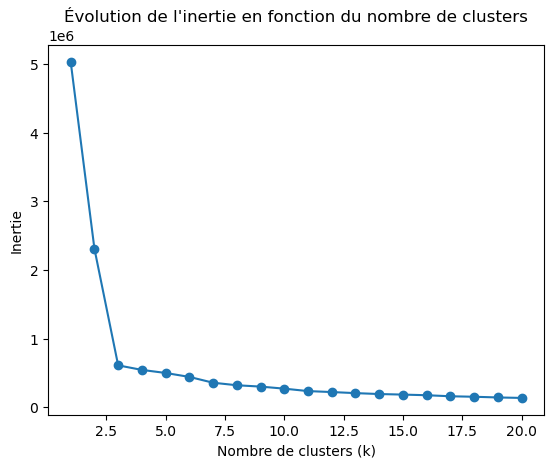

---------------------------Cluster1--------------------------------------
                                      
mins =  5.8394448716423435
maxs =  32.40028103296846
means =  13.472199170693907
---------------------------Cluster2--------------------------------------
                                      
mins =  0.9412681980501666
maxs =  8.853182469387049
means =  5.026199541435527
---------------------------Cluster3--------------------------------------
                                      
mins =  6.279178694975182
maxs =  32.722663755298306
means =  13.644701971735987
---------------------------------------------------------------------------------
les scores de séparation de chaque clusters
min inter-cluster  =  58.11810068295885
max inter-cluster  =  75.71005185791087
mean inter-cluster =  65.9182569752582


In [46]:
#################################### Question : 2.2 ######################################################
# Run clustering method for a given number of clusters
print("la méthode k-Means pour différentes valeurs de k")
print("------------------------------------------------------")
tps1 = time.time()
k=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]
inerties= []
for i in k:
    model = cluster.KMeans(n_clusters=i, init='k-means++', n_init=1)
    model.fit(datanp)
    tps2 = time.time()
    labels = model.labels_
    # informations sur le clustering obtenu
    inertie = model.inertia_
    inerties.append(inertie)
    
plt.plot(k,inerties, marker='o')
plt.xlabel('Nombre de clusters (k)')
plt.ylabel('Inertie')
plt.title('Évolution de l\'inertie en fonction du nombre de clusters')
plt.show()
#Une bonne solution de clustering pour le dataset 'xclara.arff' est 3 parce que à partir le nombre de cluster égale à 3, on voit la courbe décroit lentement.
#regroupement
for i in range(3):
    cluster_distance(i,datanp,labels,centroids)
print("---------------------------------------------------------------------------------")    
print("les scores de séparation de chaque clusters")
#séparation
print("min inter-cluster  = ",dist_min_inter_cluster(3, centroids))
print("max inter-cluster  = ",dist_max_inter_cluster(3, centroids))
print("mean inter-cluster = ",dist_mean_inter_cluster(3, centroids))

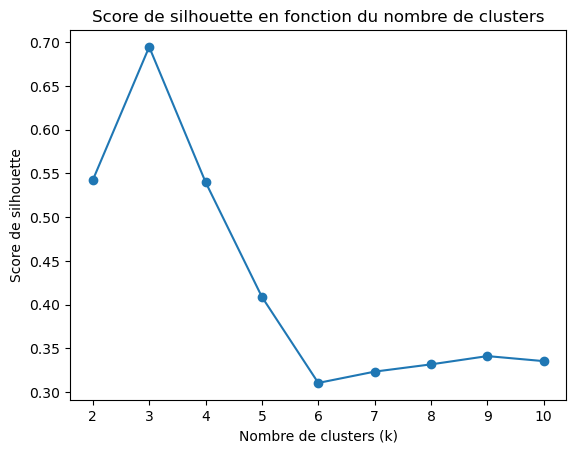

In [23]:
#################################### Question : 2.3 ###################################################### 
from sklearn.metrics import silhouette_score

k_values = range(2, 11)

silhouette_scores = []
execution_times = []

for k in k_values:
    start_time = time.time()

    # Ajustez le modèle KMeans
    kmeans = KMeans(n_clusters=k)
    kmeans_labels = kmeans.fit_predict(datanp)

    # Mesurez le temps de calcul
    end_time = time.time()
    execution_time = end_time - start_time
    execution_times.append(execution_time)

    # Calculez les scores de silhouette, Davies-Bouldin et Calinski-Harabasz
    silhouette = silhouette_score(datanp, kmeans_labels)
    silhouette_scores.append(silhouette)
    
# Maintenant, tracez le score de silhouette en fonction de k
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.xlabel('Nombre de clusters (k)')
plt.ylabel('Score de silhouette')
plt.title('Score de silhouette en fonction du nombre de clusters')
plt.show()
#la bonne solution est : k=3

    

Affichage données initiales de dataset et l'affichage de score de silhouette en fonction du nombre de clusters            


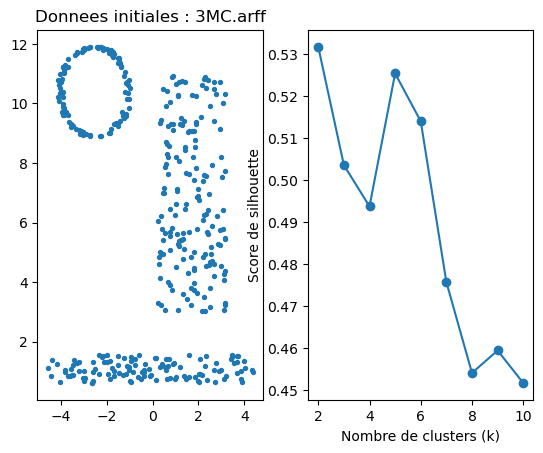

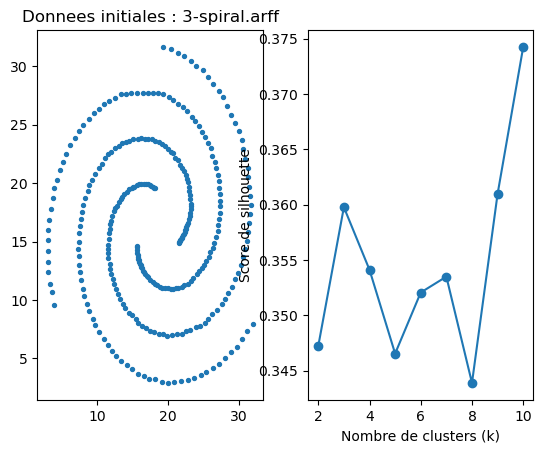

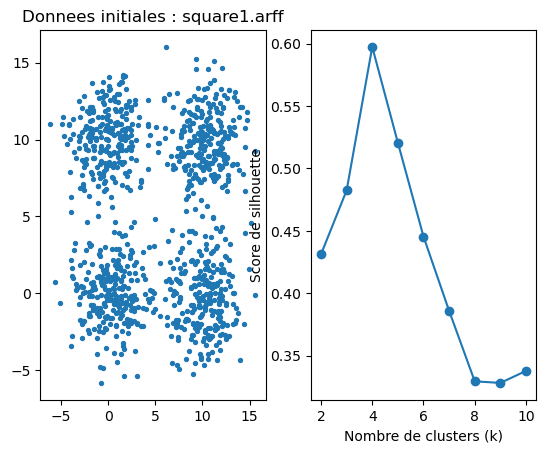

In [44]:
# fonction qui permet de transformer un dataset en un tableau de deux dimention
def data_transform(filename):
    databrut = arff.loadarff(open(path+str(filename), 'r'))
    return np.array([[x[0],x[1]] for x in databrut[0]])

path = '/home/khira/Téléchargements/'
name1="3MC.arff"
name2="3-spiral.arff"
name3="square1.arff"

from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score

k_values = range(2, 11)
data_names=[name1,name2,name3]
silhouette_scores = []
execution_times = []
print("Affichage données initiales de dataset et l'affichage de score de silhouette en fonction du nombre de clusters            ")
for name in data_names:
    for k in k_values:
        data=data_transform(name)
        start_time = time.time()
        # Ajustez le modèle KMeans
        kmeans = KMeans(n_clusters=k)
        kmeans_labels = kmeans.fit_predict(data)

        # Mesurez le temps de calcul
        end_time = time.time()
        execution_time = end_time - start_time
        execution_times.append(execution_time)

        # Calculez les scores de silhouette, Davies-Bouldin et Calinski-Harabasz
        silhouette = silhouette_score(data, kmeans_labels)
        silhouette_scores.append(silhouette)    
    
    f0 = data[:,0] # tous les élements de la première colonne
    f1 = data[:,1] # tous les éléments de la deuxième colonne
    plt.subplot(1, 2, 1)
    plt.scatter(f0, f1, s=8)
    plt.title("Donnees initiales : "+ str(name))
    # Maintenant, tracez le score de silhouette en fonction de k
    plt.subplot(1, 2, 2)
    plt.plot(range(2, 11), silhouette_scores, marker='o')
    plt.xlabel('Nombre de clusters (k)')
    plt.ylabel('Score de silhouette')
    plt.show()
    silhouette_scores = []


Affichage données initiales de dataset et l'affichage de score de silhouette en fonction du nombre de clusters            


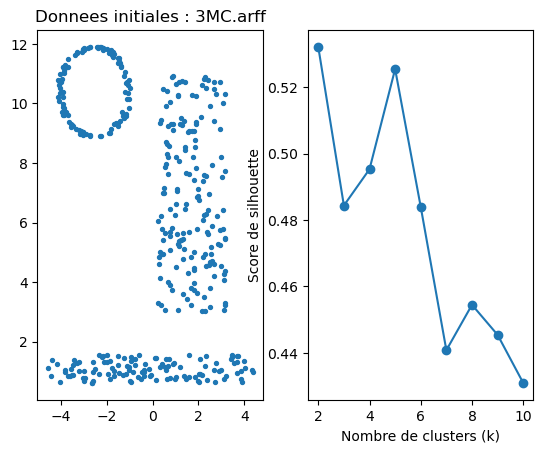

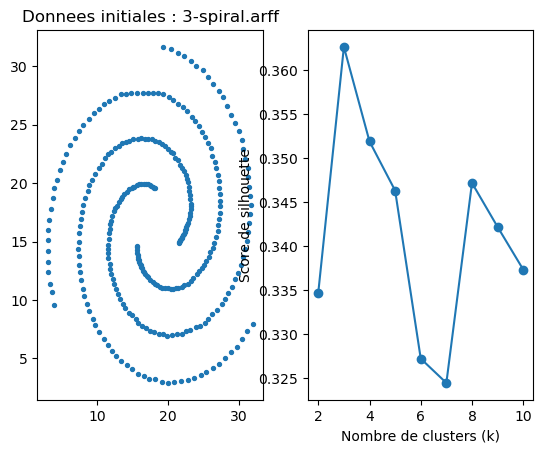

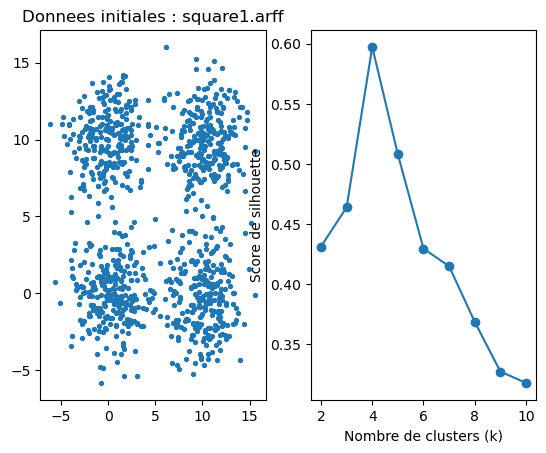

In [49]:
#################################### Question : 2.5 ######################################################
from sklearn.cluster import MiniBatchKMeans
k_values = range(2, 11)
data_names=[name1,name2,name3]
silhouette_scores = []
execution_times = []
print("Affichage données initiales de dataset et l'affichage de score de silhouette en fonction du nombre de clusters            ")
for name in data_names:
    for k in k_values:
        data=data_transform(name)
        start_time = time.time()
        # Ajustez le modèle MiniBatchKMeans
        minibatch_kmeans = MiniBatchKMeans(n_clusters=k)
        minibatch_kmeans_labels = minibatch_kmeans.fit_predict(data)
        # Mesurez le temps de calcul
        end_time = time.time()
        execution_time = end_time - start_time
        execution_times.append(execution_time)

        # Calculez les scores de silhouette, Davies-Bouldin et Calinski-Harabasz
        silhouette = silhouette_score(data, minibatch_kmeans_labels )
        silhouette_scores.append(silhouette)    
    
    f0 = data[:,0] # tous les élements de la première colonne
    f1 = data[:,1] # tous les éléments de la deuxième colonne
    plt.subplot(1, 2, 1)
    plt.scatter(f0, f1, s=8)
    plt.title("Donnees initiales : "+ str(name))
    # Maintenant, tracez le score de silhouette en fonction de k
    plt.subplot(1, 2, 2)
    plt.plot(range(2, 11), silhouette_scores, marker='o')
    plt.xlabel('Nombre de clusters (k)')
    plt.ylabel('Score de silhouette')
    plt.show()
    silhouette_scores = []